In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
channels = [f'ch_{i}' for i in range(1,15) ]



In [3]:
dislike_range = {
                "ch_1" : [-150,150] ,
                 'ch_2':[-100 , 100] , 
                 'ch_3':[-100 , 100],
                 'ch_4':[-100 , 100],
                 'ch_5':[-20,20],
                 'ch_6':[-120 , 120] ,
                 'ch_7':[-150 , 150] ,
                 'ch_8': [-140 ,140 ] , 
                 'ch_9':[-150, 150] , 
                 'ch_10':[-20 ,20] , 
                 'ch_11':[-130 ,130] , 
                 'ch_12':[-100 , 100] , 
                 'ch_13':[-100 , 100] , 
                 'ch_14':[-100 , 100]
}
like_range = {
                "ch_1" : [-60,60] ,
                 'ch_2':[-60 , 60] , 
                 'ch_3':[-100 , 100],
                 'ch_4':[-50 , 50],
                 'ch_5':[-10,10],
                 'ch_6':[-50 , 50] ,
                 'ch_7':[-50 , 50] ,
                 'ch_8': [-40 ,40 ] , 
                 'ch_9':[-50, 50] , 
                 'ch_10':[-10 ,10] , 
                 'ch_11':[-50 ,50] , 
                 'ch_12':[-50 , 50] , 
                 'ch_13':[-50 , 50] , 
                 'ch_14':[-40 , 40]
}


In [49]:
directory = 'clean_data/'

modified_data = pd.DataFrame()
count = 0
for i in os.listdir(directory):
    data = pd.read_csv(f'{directory}{i}')
    label = data['label'][0]
    for ch in channels:
        if label == 'Like':
            rng = like_range[ch]
        else:
            rng = dislike_range[ch]
        data.loc[(data[ch] < rng[0]) | (data[ch] > rng[1]),ch] = np.nan
        data[ch].replace(
            to_replace=np.nan,
            value=data[ch].mean() ,inplace=True)
    break
    data.to_csv(f'modified_data/{i[:-4]}.csv' , index = False)

In [45]:
data

ch_1       ch_2        ch_3       ch_4       ch_5       ch_6  \
0   -60.000000 -60.000000 -100.000000 -50.000000  -9.436008 -50.000000   
1   -60.000000 -60.000000 -100.000000 -50.000000 -10.000000 -50.000000   
2   -60.000000 -60.000000 -100.000000 -50.000000 -10.000000 -50.000000   
3   -60.000000 -60.000000 -100.000000 -50.000000 -10.000000 -50.000000   
4   -60.000000 -60.000000 -100.000000 -50.000000 -10.000000 -50.000000   
..         ...        ...         ...        ...        ...        ...   
507  28.442894  60.000000   48.808169  40.061856  -0.782616  38.177822   
508  21.123961  56.879304   42.205580  50.000000  -2.004503  24.526016   
509  19.493310  55.680895   40.000021  50.000000  -2.472098  20.212736   
510  27.308906  60.000000   42.576490  50.000000   0.578219  32.007478   
511  39.158190  60.000000   52.325007  50.000000   2.140148  50.147528   

          ch_7       ch_8       ch_9     ch_10  ch_11      ch_12      ch_13  \
0   -50.000000 -40.000000 -50.000000 -0.693032  -50.0 -50.000000 -50.000000   
1   -50.000000 -40.000000 -50.000000 -2.648777  -50.0 -50.000000 -50.000000   
2   -50.000000 -40.000000 -50.000000 -3.218896  -50.0 -50.000000 -50.000000   
3   -50.000000 -40.000000 -50.000000 -1.296677  -50.0 -50.000000 -50.000000   
4   -50.000000 -40.000000 -50.000000  0.609537  -50.0 -50.000000 -50.000000   
..         ...        ...        ...       ...    ...        ...        ...   
507  46.307181  40.000000  50.000000 -4.772834   50.0  28.294707   6.024713   
508  32.786998  26.036106  41.374210 -1.138838   50.0  23.424002  -9.049142   
509  32.579787  16.269948  35.044098  9.625259   50.0  23.568609  -8.071164   
510  36.065034  34.566416  50.179327  8.590936   50.0  25.939601   7.965533   
511  46.227864  40.000000  50.000000 -0.782772   50.0  29.942859  22.862857   

         ch_14 label  
0   -40.000000  Like  
1   -40.000000  Like  
2   -40.000000  Like  
3   -40.000000  Like  
4   -40.000000  Like  
..         ...   ...  
507  33.581476  Like  
508  28.729909  Like  
509  27.190252  Like  
510  29.234193  Like  
511  32.419226  Like  

[512 rows x 15 columns]

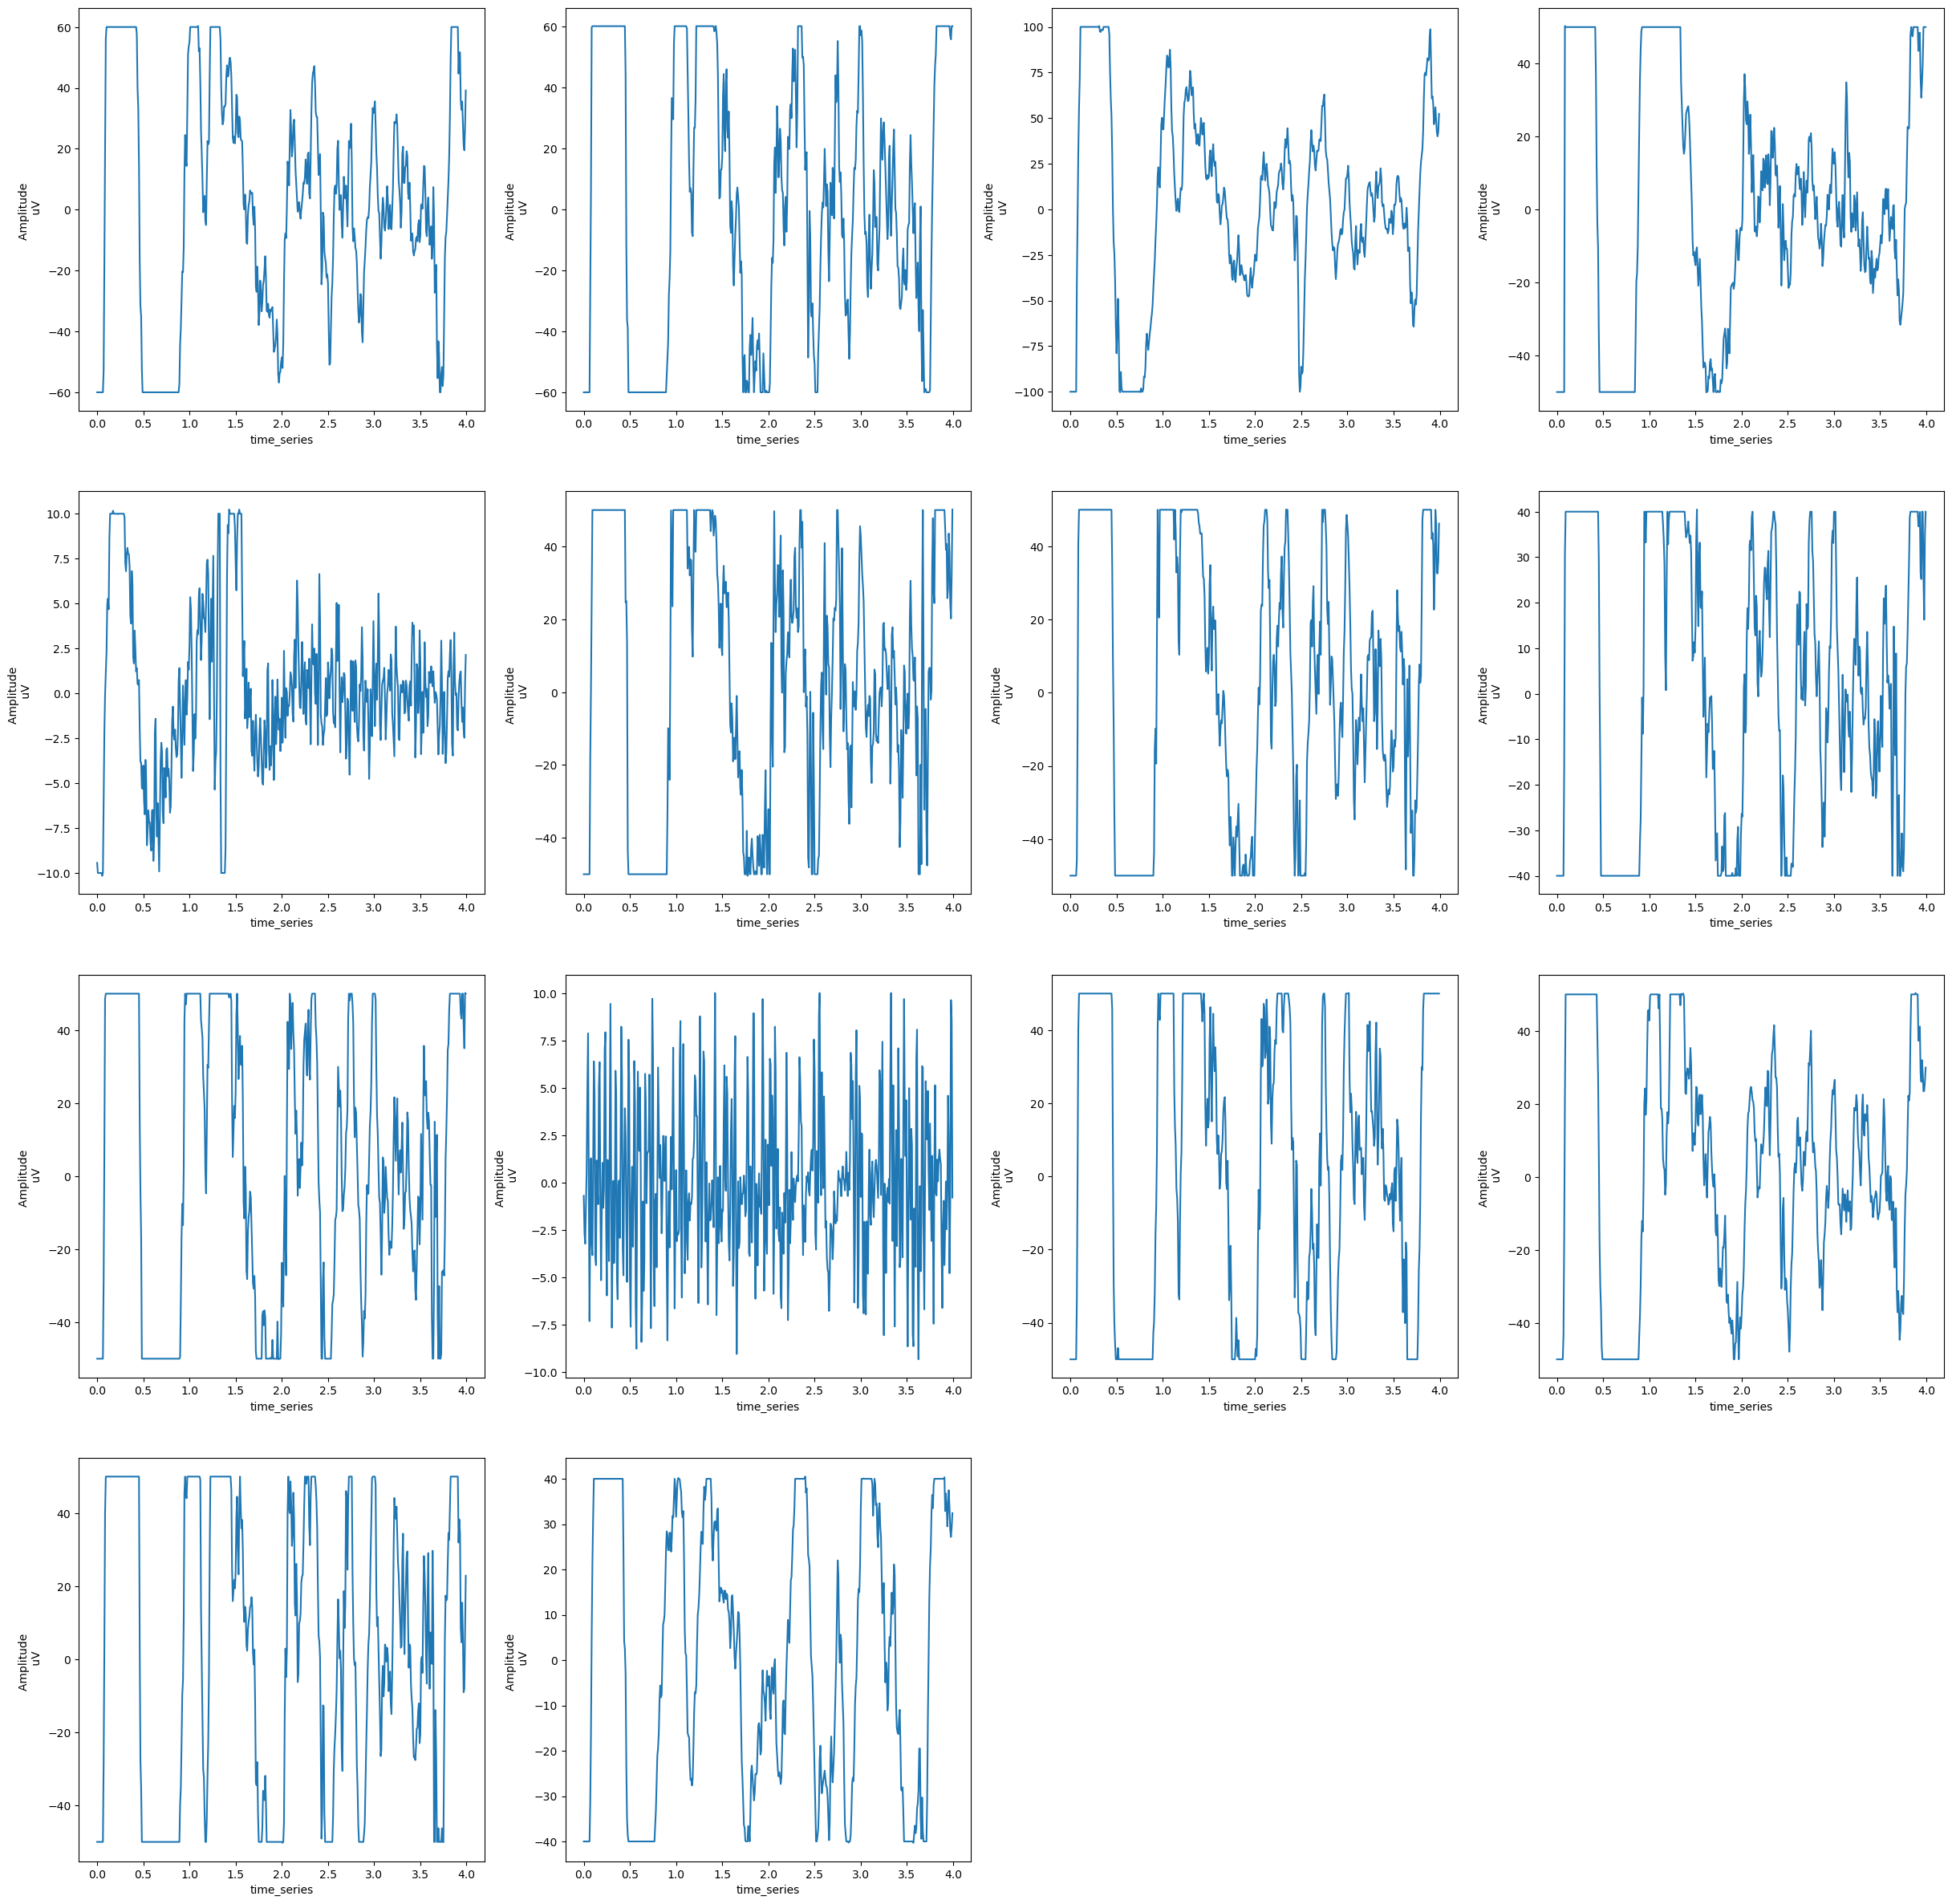

In [46]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
fs = 128
time = [i/fs for i in range(len(data))]
for i , j in enumerate(channels , 1):
    plt.subplot(4,4,i)
    plt.plot(time , data[j])
    plt.xlabel('time_series')
    plt.ylabel('Amplitude \n uV')

In [47]:
a = pd.DataFrame([[1,4,5],[4,5,6],[3,2,3]] ,  columns=['x','y','z'])

In [40]:
a

x  y  z
0  1  4  5
1  4  5  6
2  3  2  3

In [42]:
a.loc[(a['x'] > 1),'x'] = 2

In [43]:
a

x  y  z
0  1  4  5
1  2  5  6
2  2  2  3